<a href="https://colab.research.google.com/github/Neeraj-364/Machine-Learning-Project/blob/main/HeartDiseasePL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression          # Logistic Regression
from sklearn.ensemble import RandomForestClassifier          # Random Forest



In [8]:
df=pd.read_csv("heart.csv")

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df['sex'].value_counts()
def count_males_females(df, sex_column):
    counts = df[sex_column].value_counts()

    males = counts.get(1, 0) and counts.get(1, 0)  # Default to 0 if no males
    females = counts.get(0, 0)  # Default to 0 if no females

    return {'males': males, 'females': females}

count_males_females(df, "sex")

{'males': 713, 'females': 312}

<Axes: xlabel='sex', ylabel='target'>

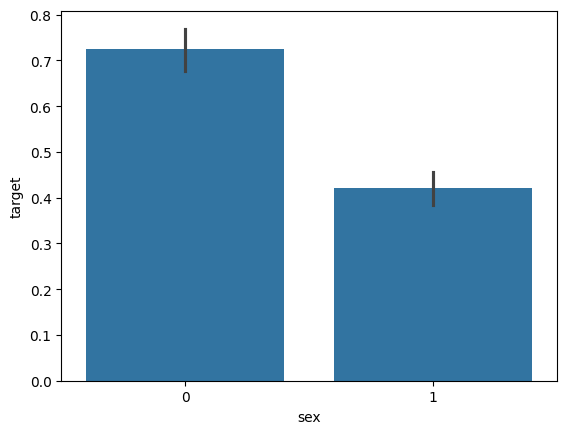

In [13]:
#print("1: Male, 0: Female")

sns.barplot(x="sex", y="target", data=df)

target
1    526
0    499
Name: count, dtype: int64


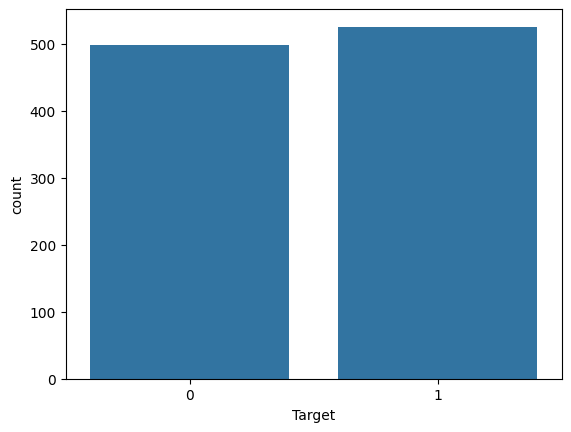

In [14]:
x = df["target"]
sns.countplot(x=x)

plt.xlabel("Target")

target_temp = df.target.value_counts()
print(target_temp)

In [15]:
print("Percentage of patience without heart problems: " + str(round(target_temp[0] * 100 / 303, 2)) + "%")
print("Percentage of patience with heart problems: " + str(round(target_temp[1] * 100 / 303, 2)) + "%")

Percentage of patience without heart problems: 164.69%
Percentage of patience with heart problems: 173.6%


# Total Missing percent of data

In [16]:
missing_data = df.isnull().sum()

In [17]:
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate=df[df.duplicated()]
print("Duplicate Rows:")
duplicate
df=df.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate Rows:


In [18]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [19]:
x=df.drop(['target'],axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
print("xTrain->",x_train.shape[0],"xTest->",x_test.shape[0],"YTrain->",y_train.shape[0],"YTest->",y_test.shape[0])

xTrain-> 211 xTest-> 91 YTrain-> 211 YTest-> 91


 # Decision tree

Done
[0.66, 0.7, 0.74, 0.71, 0.71, 0.68, 0.7, 0.73, 0.7, 0.71, 0.74, 0.74, 0.74]


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

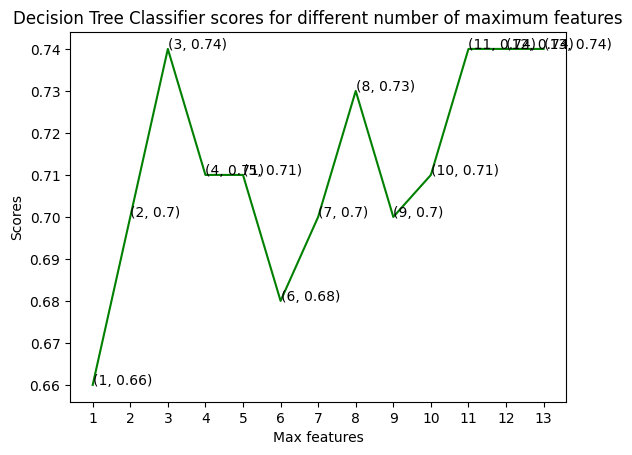

In [20]:
# List to store decision tree scores
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(x_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(x_test.values, y_test.values), 2))
print("Done")

print(dt_scores)


dt_classifier = DecisionTreeClassifier(max_features=13, random_state=0)
dt_classifier.fit(x_train.values, y_train.values)

plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color='green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')


In [21]:
knn_scores = []

# Loop to calculate scores for k values from 2 to 20
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    knn_score = round(knn_classifier.score(x_test, y_test), 2)
    knn_scores.append(knn_score)

# Find the best k and its corresponding accuracy
best_k = range(2, 21)[knn_scores.index(max(knn_scores))]
best_score = max(knn_scores)
print(f"Best n_neighbors: {best_k} with accuracy: {best_score}")

# Set n_neighbors=5 and print the classification report
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

Best n_neighbors: 11 with accuracy: 0.7


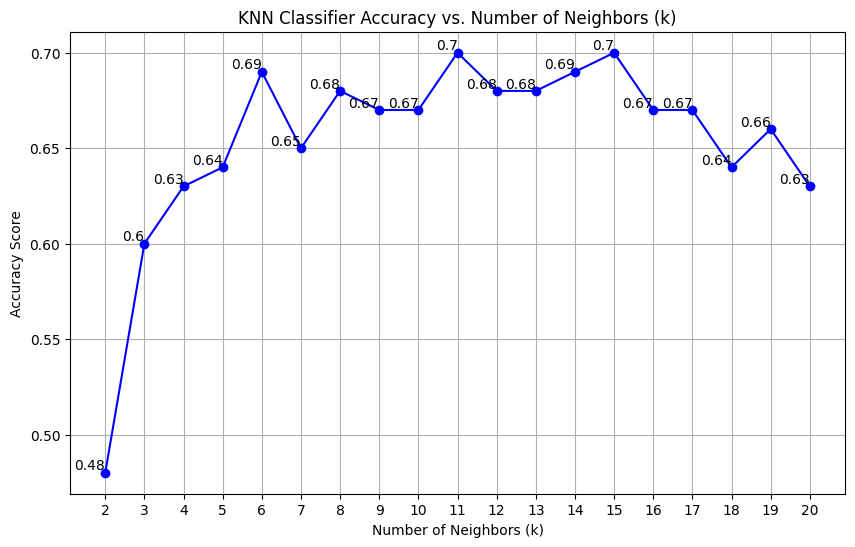

In [22]:
k_values = range(2, 21)
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.grid()
for i, score in enumerate(knn_scores):
    plt.text(k_values[i], score, str(score), fontsize=10, ha='right', va='bottom')
plt.show()


In [23]:
score_knn = round(best_score * 100, 2)
print(f"The maximum accuracy achieved using KNN is: {score_knn} %")

The maximum accuracy achieved using KNN is: 70.0 %


# logistic Regression

In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train.values, y_train.values)
logistic_model_prediction = logistic_model.predict(x_test.values)
lr_score=accuracy_score(y_test.values, logistic_model_prediction)
print("Accuracy is given by LR is:",accuracy_score(y_test.values, logistic_model_prediction))

Accuracy is given by LR is: 0.7912087912087912


In [25]:
score_lr=round(accuracy_score(y_test.values, logistic_model_prediction)*100,2)

In [26]:
print("Accuracy is given by lr is:",score_lr)

Accuracy is given by lr is: 79.12


# SVM

In [27]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
Y_pred_svm = sv.predict(x_test)

In [28]:
 Y_pred_svm.shape

(91,)

In [29]:
score_svm = round(accuracy_score(Y_pred_svm, y_test) * 100, 2)
print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")

The accuracy score achieved using Linear SVM is: 79.12 %


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x = 0  # Initialize to avoid 'undefined variable' issues

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train, y_train)
    Y_pred_dt = dt.predict(x_test)

    # Calculate the current accuracy
    current_accuracy = round(accuracy_score(y_test, Y_pred_dt) * 100, 2)

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train the best model found during the iteration
print(f"Best Random State: {best_x}, Maximum Accuracy: {max_accuracy}%")
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train, y_train)
Y_pred_dt = dt.predict(x_test)

Best Random State: 13, Maximum Accuracy: 74.73%


# XG boost

In [31]:
!pip install xgboost

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb=round((xgb_accuracy)*100,2)

In [33]:
print("Accuracy given by XGB is:",xgb,"%")

Accuracy given by XGB is: 73.63 %


# comparison of algorithm accuracy scores final output

In [34]:
scores = [score_lr,score_svm, score_knn, max_accuracy,  xgb]
algorithms = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 79.12 %
The accuracy score achieved using Support Vector Machine is: 79.12 %
The accuracy score achieved using K-Nearest Neighbors is: 70.0 %
The accuracy score achieved using Decision Tree is: 74.73 %
The accuracy score achieved using XGBoost is: 73.63 %


In [35]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data (make sure 'algorithms' and 'scores' lists are defined)
data = pd.DataFrame({
    'Algorithms': algorithms,
    'Accuracy Score': scores
})

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data['Algorithms'],
    y=data['Accuracy Score'],
    marker_color='skyblue'
))

# Set labels and title
fig.update_layout(
    title="Comparison of Algorithm Accuracy Scores",
    xaxis_title="Algorithms",
    yaxis_title="Accuracy Score",
    xaxis_tickangle=-45  # Rotate x-axis labels
)

# Show the plot
fig.show()


In [36]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validated accuracy: {best_score}")


Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated accuracy: 0.8675385647216634


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x = 0  # Initialize to avoid 'undefined variable' issues

# Loop over random states from 0 to 199
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train, y_train)  # Fit the model
    Y_pred_rf = rf.predict(x_test)  # Make predictions

    # Calculate the current accuracy
    current_accuracy = round(accuracy_score(y_test, Y_pred_rf) * 100, 2)

    # Check if current accuracy is the best so far
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train the best model found during the iteration
print(f"Best Random State: {best_x}, Maximum Accuracy: {max_accuracy}%")

# Train the Random Forest model with the best random state
best_rf = RandomForestClassifier(random_state=best_x)
best_rf.fit(x_train, y_train)
Y_pred_best_rf = best_rf.predict(x_test)

# Optionally, you can print the accuracy of the best model
final_accuracy = round(accuracy_score(y_test, Y_pred_best_rf) * 100, 2)
print(f"Final Accuracy of the best Random Forest model: {final_accuracy}%")


Best Random State: 84, Maximum Accuracy: 81.32%
Final Accuracy of the best Random Forest model: 81.32%
